In [1]:
# Installing and loading in caret
install.packages("caret")
library(caret)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Loading required package: lattice



In [2]:
# attach the iris dataset to the environment
data(iris)
# rename the dataset
dataset <- iris

In [3]:
# wow that was easy

In [4]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

In [5]:
# seperating the data so that the data used for developing the model is not the same as those used to validate it

In [6]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [7]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [8]:
# This tells us the type of data that each colmn in the dataset is

In [9]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [10]:
# just taking a glance at the first few rows of the data to make sure verything looks right, it does

In [11]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [12]:
# Returns all possible options for the species variable

In [13]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [14]:
# This is good, each flower tpye is being evenly represented in the data used to build the model

In [15]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:40  
 Median :5.800   Median :3.00   Median :4.250   Median :1.300   virginica :40  
 Mean   :5.867   Mean   :3.07   Mean   :3.771   Mean   :1.205                  
 3rd Qu.:6.400   3rd Qu.:3.40   3rd Qu.:5.125   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

In [16]:
# A summary of the dataset with lots of statistics for each column 

In [17]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

In [18]:
# this defines each type of data from the dataset as being an x or y value for the purposes of plotting

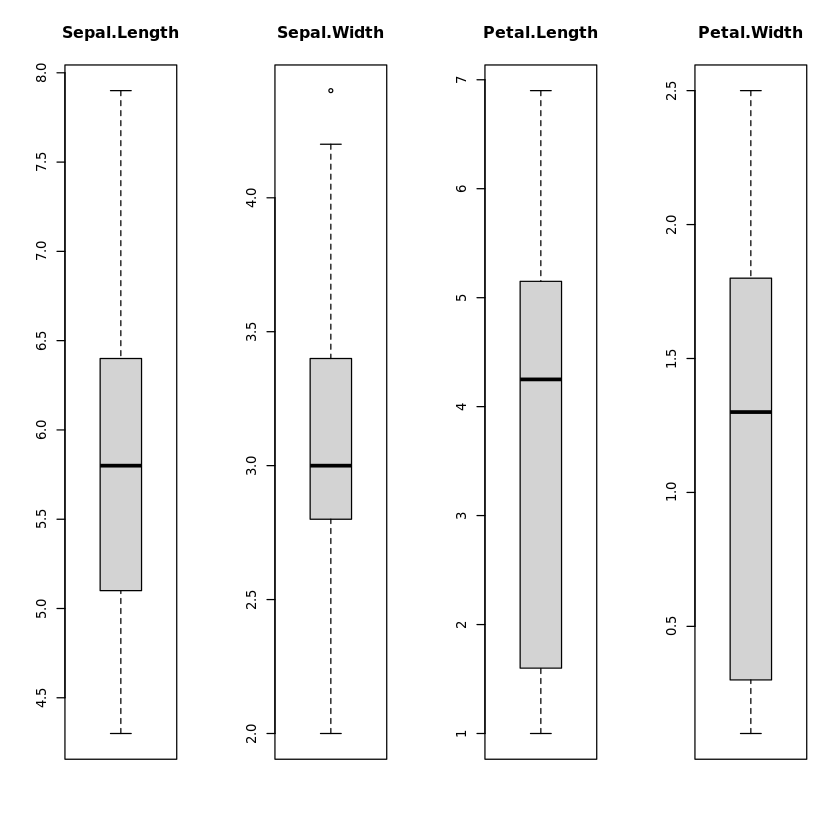

In [19]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

In [20]:
# Note that because we just dfined each column as x or y data the process becomes more streamlined for plotting

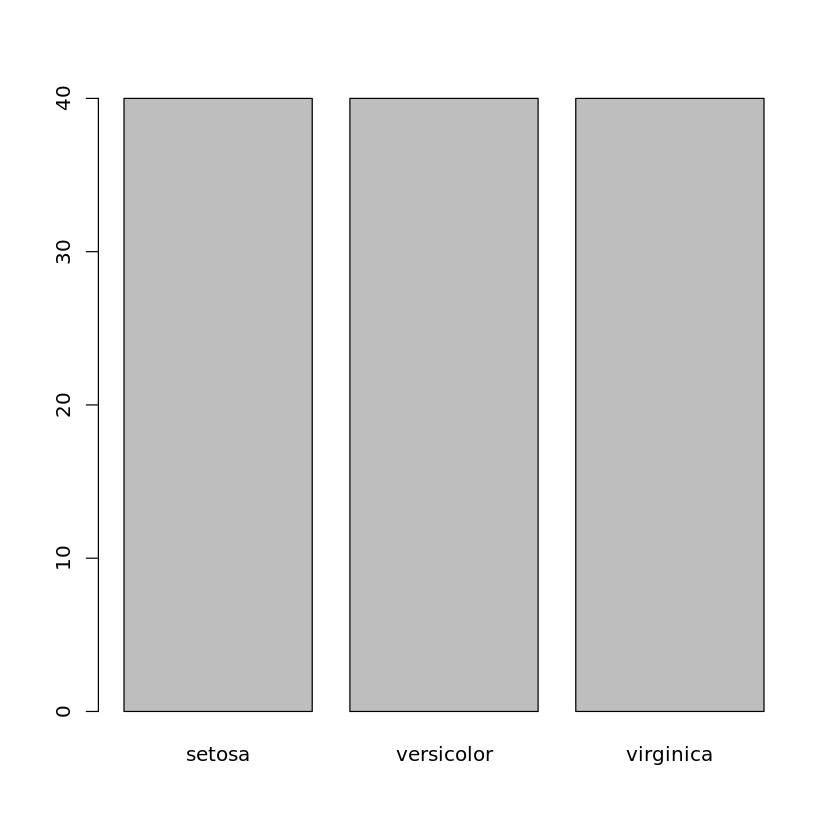

In [21]:
# barplot for class breakdown
plot(y)

In [22]:
# A barplot of our y variable, which we have defined as class previously, all values are at 40, which we already know from earlier is correct

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



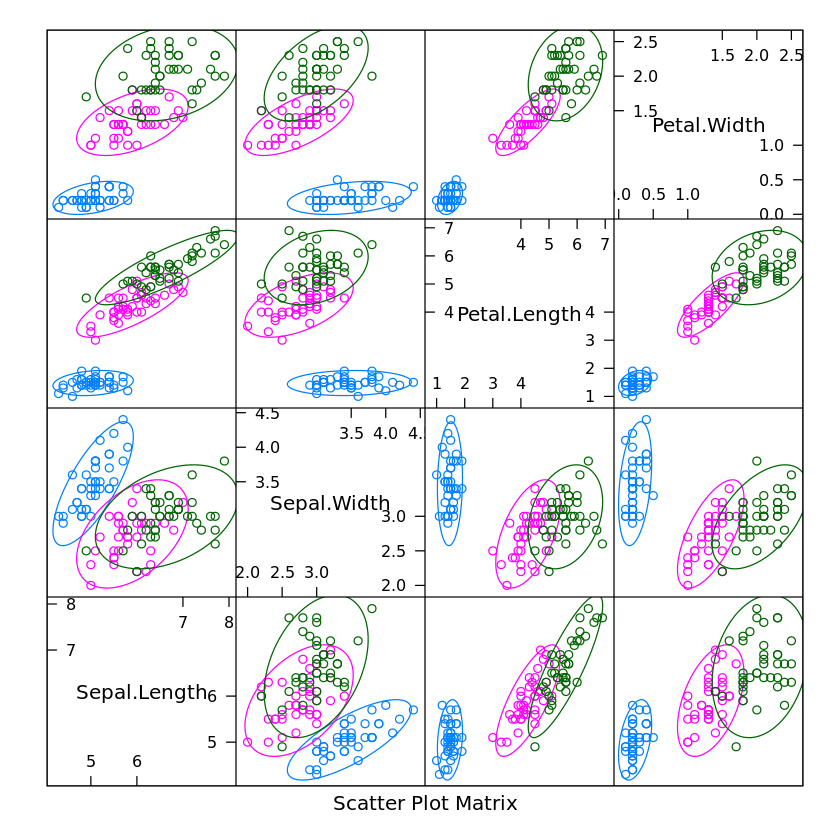

In [23]:
# Installing the ellipse package and creating a scatterplot matrix
install.packages("ellipse")
featurePlot(x=x, y=y, plot="ellipse")

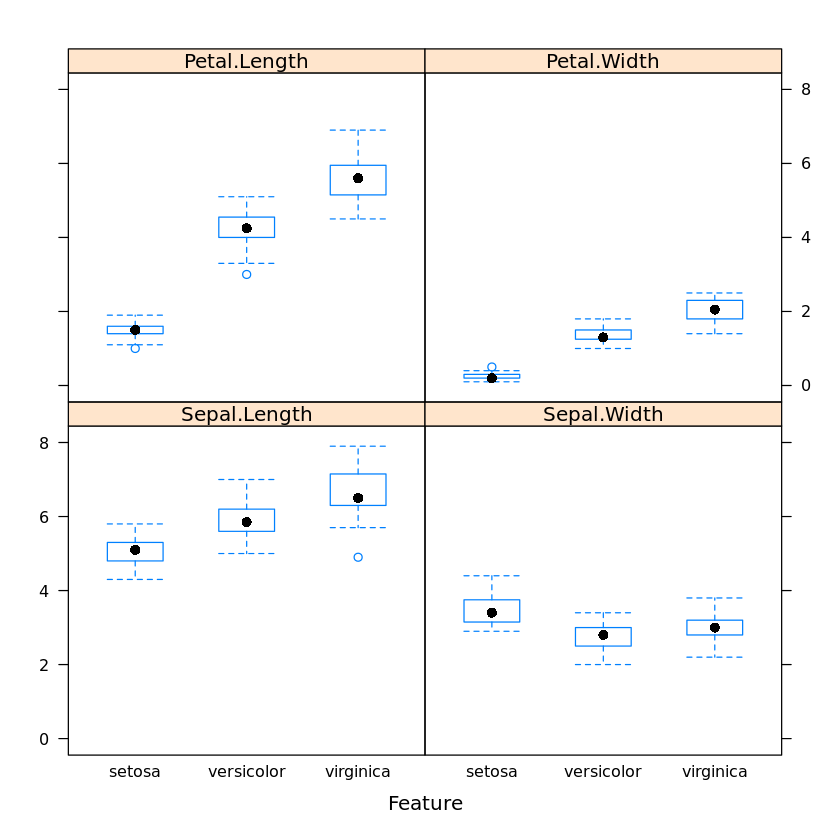

In [24]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

In [25]:
# more plots, as nice as python is this a good bit easier in r so it seems

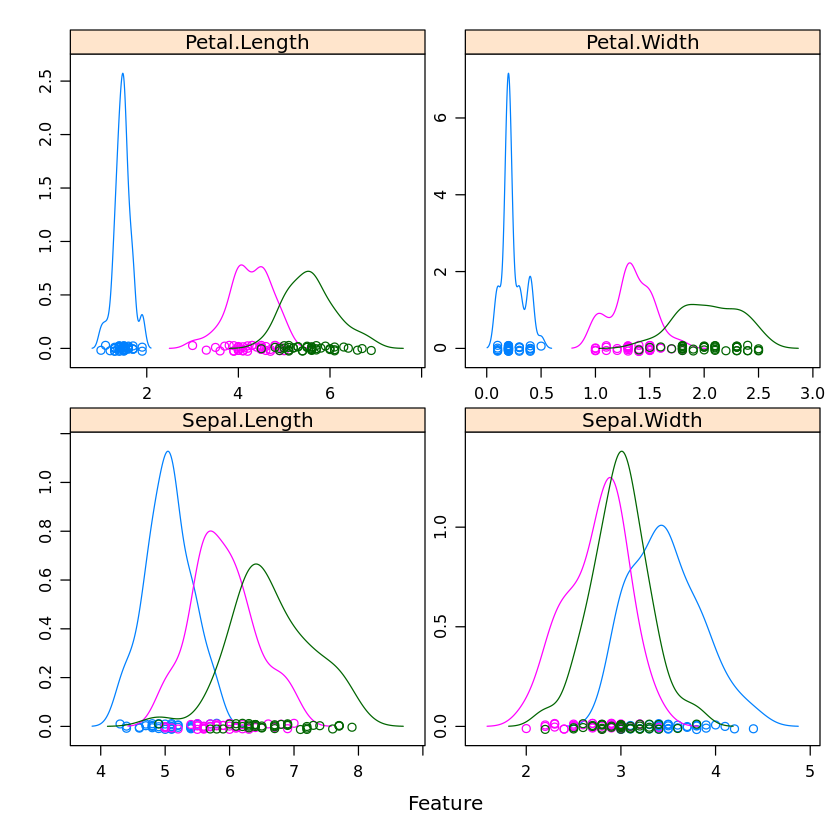

In [26]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [27]:
# density plots with free x and y axis to autoscale for each data set with datapoints on the x axis and relative intesnities as the curves above

In [28]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [29]:
# this method splits thew data into 10 parts and trains itself on 9 of them and tests this trainign on the tenth

In [30]:
# Building the 5 different models to be tested
install.packages("kernlab")
urlPackage <- "https://cran.r-project.org/src/contrib/Archive/randomForest/randomForest_4.6-14.tar.gz"
install.packages(urlPackage, repos=NULL, type="source") 
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
# Holy Heck, figuring out what the problem was and getting the right version of randomForest took way longer than it should've

In [31]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333       1    1    0
cart 0.8333333 0.9166667 0.9583333 0.9500000       1    1    0
knn  0.8333333 0.9166667 1.0000000 0.9583333       1    1    0
svm  0.9166667 0.9166667 0.9583333 0.9583333       1    1    0
rf   0.9166667 0.9166667 0.9583333 0.9583333       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875   1.000 1.0000 0.9750       1    1    0
cart 0.750   0.875 0.9375 0.9250       1    1    0
knn  0.750   0.875 1.0000 0.9375       1    1    0
svm  0.875   0.875 0.9375 0.9375       1    1    0
rf   0.875   0.875 0.9375 0.9375       1    1    0


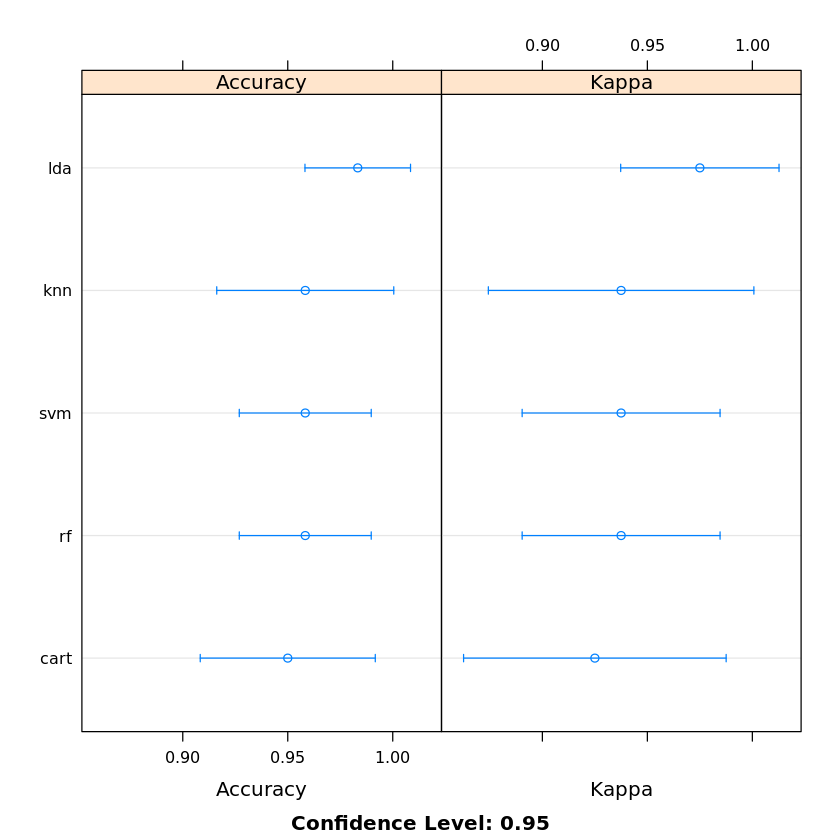

In [32]:
# compare accuracy of models
dotplot(results)

In [33]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



In [34]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         1
  virginica       0          0         9

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           0.9000
Specificity                 1.0000            0.9500           1.0000
Pos Pred Value              1.0000            0.9091           1.0000
Neg Pred Value              1.0000            1.0000           0.9524
P